# T2 - Analysis of temporal trends on abundance of Blue Jay in North America

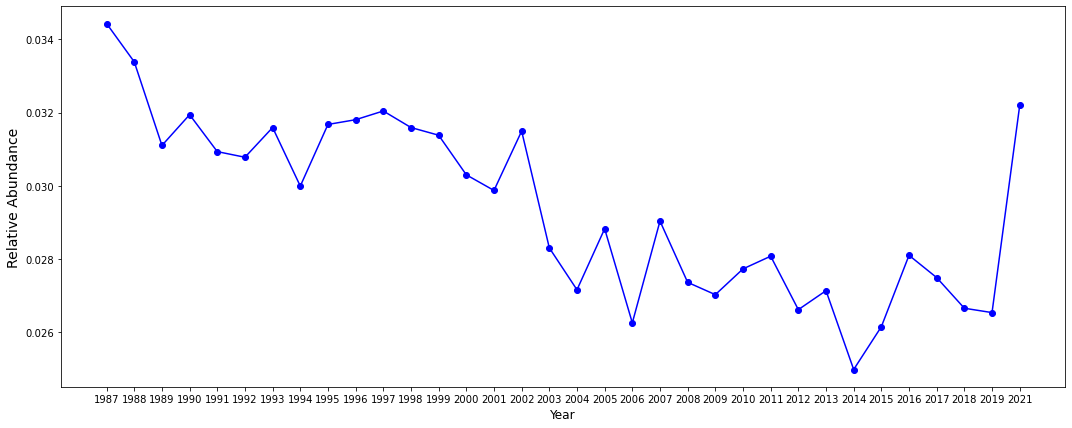

/tmp/ipykernel_7618/3079800134.py:60: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, name='Abundance Heat Map',


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the blueJay and transect data:
blueJay = pd.read_csv('blueJay.csv', encoding='latin1')
transect = pd.read_csv('routes.csv', encoding='latin1')

# Compute the total abundance per year and exclude the year 2020 due to lack of data
abundance_by_year = blueJay.loc[:, :'2021'].sum(axis=0)
abundance_by_year = abundance_by_year.drop('2020')

# Calculate the relative abundance for each year
relative_abundance = abundance_by_year / abundance_by_year.sum()

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(relative_abundance.index, relative_abundance.values, '-o', color='blue')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Relative Abundance', fontsize=14)
plt.show()


## Total abundance values in a map

import folium
import numpy as np
from folium.plugins import HeatMap

# Check for NaN values in transect dataframe:
if transect.isnull().values.any():
    print("NaN values found in transect dataframe")
    transect = transect.dropna()

# Create a dictionary to store the geographic coordinates for each route
route_coords = {}
for index, row in transect.iterrows():
    if row['Active'] == 1:
        route_coords[row['route']] = [row['Latitude'], row['Longitude']]

# Create a Folium map centered on North America
m = folium.Map(location=[38, -96], zoom_start=4)

# Create a list of (latitude, longitude, abundance) tuples for all years
heat_data = []
for year in relative_abundance.index[:-1]:
    # Get the abundance data for the current year and convert it to a list of (route, abundance) tuples
    year_data = blueJay[['route', year]].dropna()
    year_data = [(row['route'], row[year]) for _, row in year_data.iterrows()]

    # Add the (latitude, longitude, abundance) tuples for the current year to the heat_data list
    for route, abundance in year_data:
        coords = route_coords.get(route)
        if coords:
            heat_data.append((coords[0], coords[1], abundance))

# Create a colormap for the abundance data
max_abundance = np.max([data[2] for data in heat_data])
color_scale = {0.0: '#f7fcfd', 0.2: '#e0ecf4', 0.4: '#9ebcda', 0.6: '#8c6bb1', 0.8: '#810f7c', 1: '#4d004b'}

# Create a heatmap layer for the abundance data and add it to the map
HeatMap(heat_data, name='Abundance Heat Map', 
        min_opacity=0.3, 
        max_val=max_abundance, 
        gradient=color_scale, 
        radius=15, blur=10).add_to(m)

# Add markers for each data point to the map
#for data in heat_data:
 #   folium.Marker(location=[data[0], data[1]], icon=None, tooltip=f"Abundance: {data[2]}").add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Show the map
m


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the blueJay and transect data:
blueJay = pd.read_csv('blueJay.csv', encoding='latin1')
transect = pd.read_csv('routes.csv', encoding='latin1')

In [8]:
# Calculate the mean relative abundance of Blue Jays for each year
mean_abundance = blueJay.mean(axis=1, skipna=True)

# Add the mean abundance to the blueJay DataFrame
blueJay['mean_abundance'] = mean_abundance

# Print the first 5 rows of the updated DataFrame
print(blueJay.head())

   1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  ...  2014  \
0     1   NaN   1.0   NaN   NaN   1.0   3.0   5.0   4.0   1.0  ...   1.0   
1     0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   0.0   0.0  ...   0.0   
2     0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3     0   3.0   2.0   2.0   4.0   8.0   2.0   1.0   2.0   4.0  ...   0.0   
4     2   2.0   1.0   0.0   0.0   4.0   4.0   1.0   1.0   1.0  ...   0.0   

   2015  2016  2017  2018  2019  2020  2021       route  mean_abundance  
0   0.0   0.0   0.0   0.0   2.0   NaN     0  840_02_004        2.000000  
1   0.0   0.0   0.0   0.0   0.0   NaN     0  840_02_007        0.000000  
2   NaN   0.0   0.0   0.0   0.0   NaN     0  840_02_008        0.000000  
3   2.0   0.0   0.0   1.0   1.0   NaN     1  840_02_010        1.666667  
4   0.0   1.0   1.0   0.0   2.0   NaN     2  840_02_012        1.193548  

[5 rows x 37 columns]


/tmp/ipykernel_17367/3335268967.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_abundance = blueJay.mean(axis=1, skipna=True)


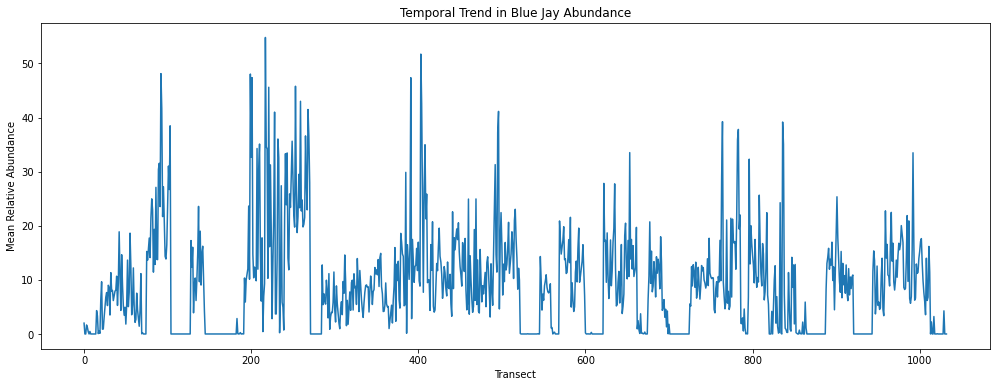

In [18]:
# Convert the index to a numeric data type:
mean_abundance.index = pd.to_numeric(mean_abundance.index)

# Plot the mean relative abundance estimates over time using a line graph:
plt.figure(figsize=(17, 6))
plt.plot(mean_abundance.index, mean_abundance.values)
plt.xlabel('Transect')
plt.ylabel('Mean Relative Abundance')
plt.title('Temporal Trend in Blue Jay Abundance')
plt.show()